## From the survey results, we have built a dataset with the following columns:

- `Age`: age of the applicant, >35 years old or <35 years old (categorical)
- `EdLevel`: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
- `Gender`: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
- `MainBranch`: whether the applicant is a profesional developer (categorical)
- `YearsCode`: how long the applicant has been coding (integer)
- `YearsCodePro`: how long the applicant has been coding in a professional context, (integer)
- `PreviousSalary`: the applicant's previous job salary (float)
- `ComputerSkills`: number of computer skills known by the applicant (integer)
- `Employed`: target variable, whether the applicant has been hired (categorical)
- `employment` is whether they are currently employed or not 
- `accessibility`:??? need to find out, hypothesis is that it is whether a variable to see who is more willing to travel or not 


In [22]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [23]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [25]:
#removing the unnamed column as we defininitely do not need that
dataframe = pd.DataFrame(data[['Age', 'Accessibility', 'EdLevel',
                               'Employment', 'Gender', 'MentalHealth',
                               'MainBranch', 'YearsCode', 'YearsCodePro',
                               'Country', 'PreviousSalary', 'HaveWorkedWith',
                              'ComputerSkills', 'Employed']])
dataframe.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [26]:
dataframe['Age'] = dataframe['Age'].astype('category')
dataframe['Accessibility'] = dataframe['Accessibility'].astype('category')
dataframe['EdLevel'] = dataframe['EdLevel'].astype('category')
dataframe['Employment'] = dataframe['Employment'].astype('category')
dataframe['Gender'] = dataframe['Gender'].astype('category')
dataframe['MentalHealth'] = dataframe['MentalHealth'].astype('category')
dataframe['MainBranch'] = dataframe['MainBranch'].astype('category')
dataframe['Country'] = dataframe['Country'].astype('category')
dataframe['Employed'] = dataframe['Employed'].astype('category')



Checking relationship 

Comparing it to `Employed`

<Axes: xlabel='Age', ylabel='count'>

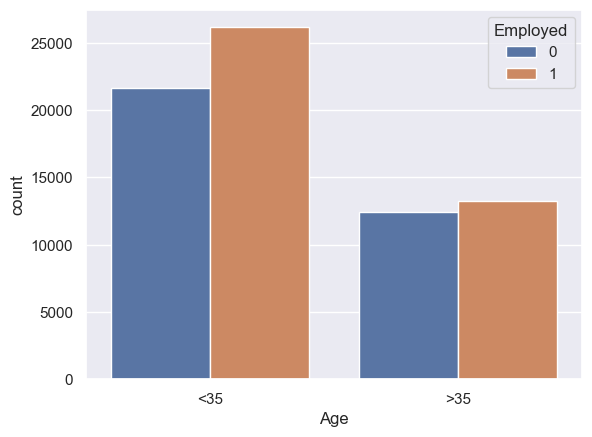

In [27]:
sb.countplot(dataframe, x="Age",hue = "Employed")

<Axes: xlabel='Accessibility', ylabel='count'>

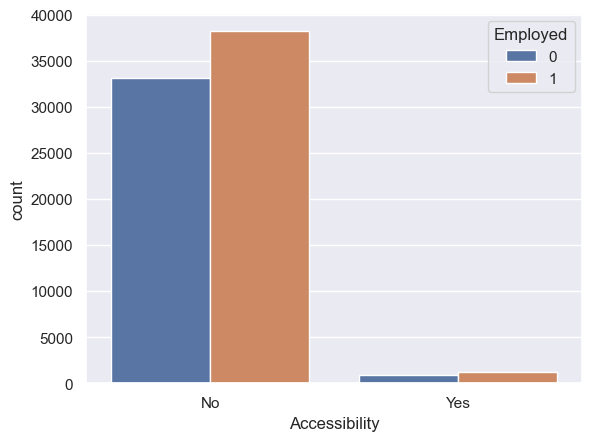

In [28]:
sb.countplot(dataframe, x="Accessibility",hue = "Employed")



<Axes: xlabel='EdLevel', ylabel='count'>

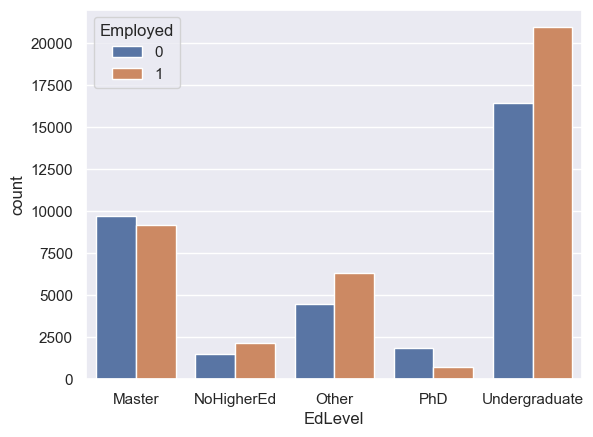

In [29]:
sb.countplot(dataframe, x="EdLevel",hue = "Employed")


<Axes: xlabel='Gender', ylabel='count'>

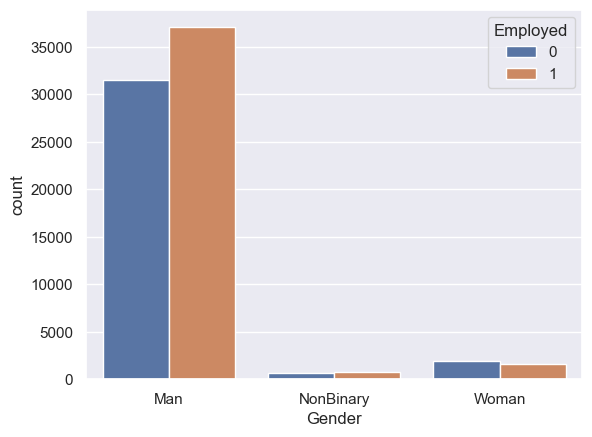

In [30]:
sb.countplot(dataframe, x="Gender",hue = "Employed")


<Axes: xlabel='MentalHealth', ylabel='count'>

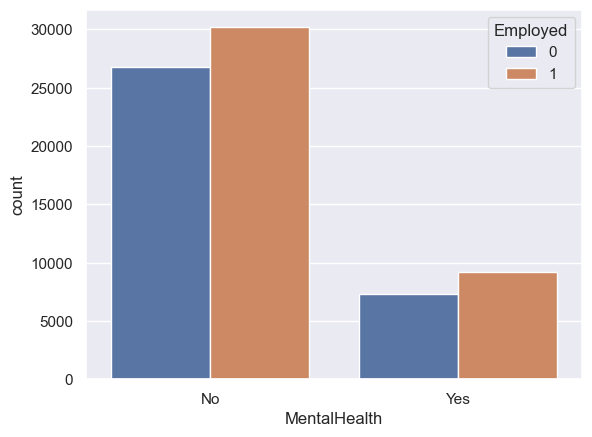

In [31]:
sb.countplot(dataframe, x="MentalHealth",hue = "Employed")


<Axes: xlabel='MainBranch', ylabel='count'>

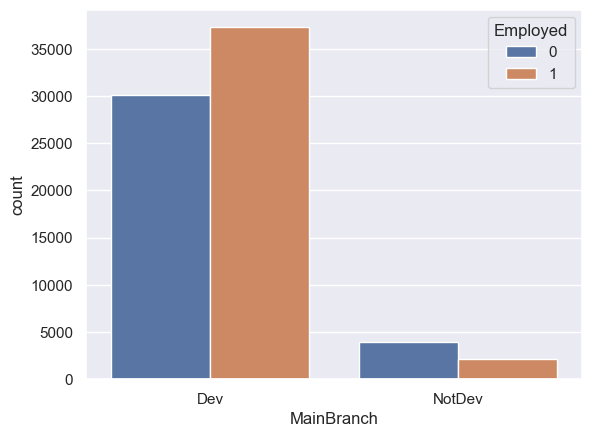

In [32]:
sb.countplot(dataframe, x="MainBranch",hue = "Employed")

<Axes: xlabel='Employment', ylabel='count'>

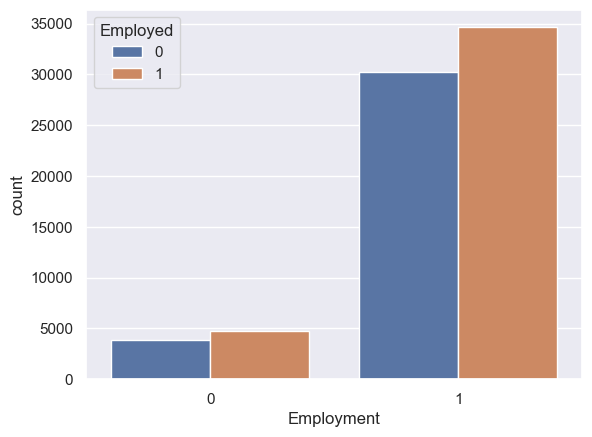

In [33]:
sb.countplot(dataframe, x="Employment",hue = "Employed")

<Axes: xlabel='YearsCode', ylabel='Employed'>

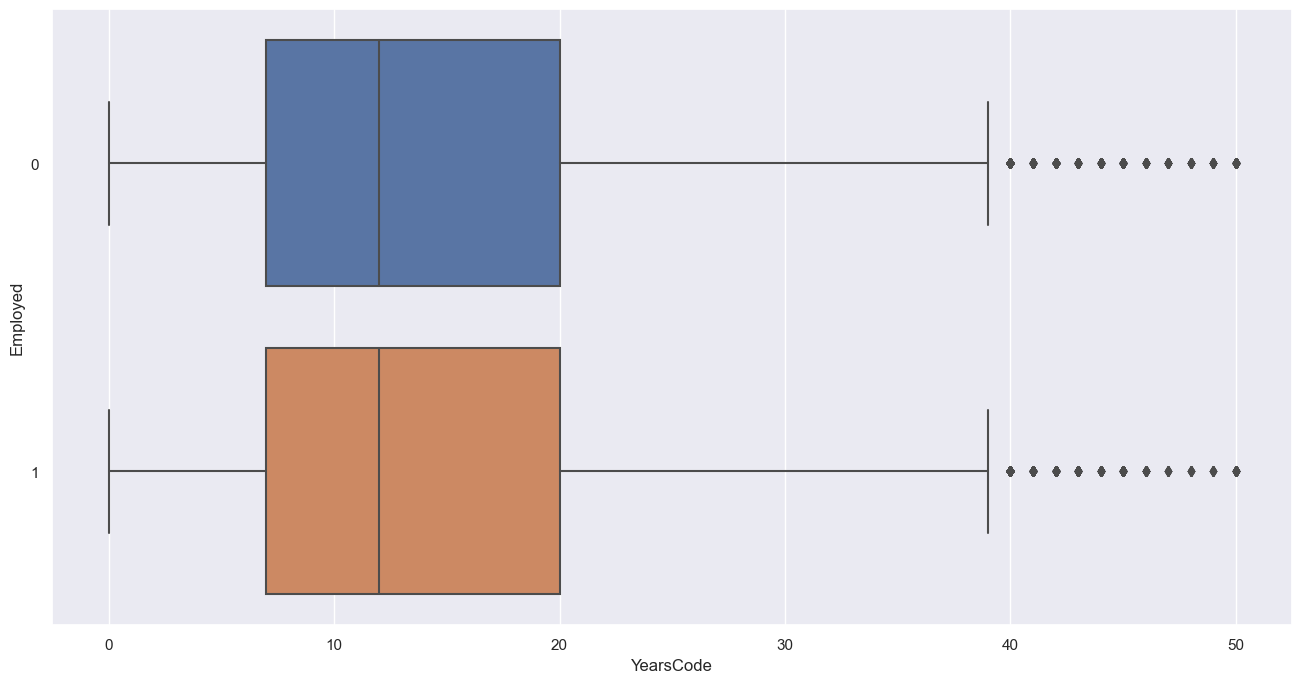

In [34]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'YearsCode', y = 'Employed', data = dataframe)

<Axes: xlabel='YearsCodePro', ylabel='Employed'>

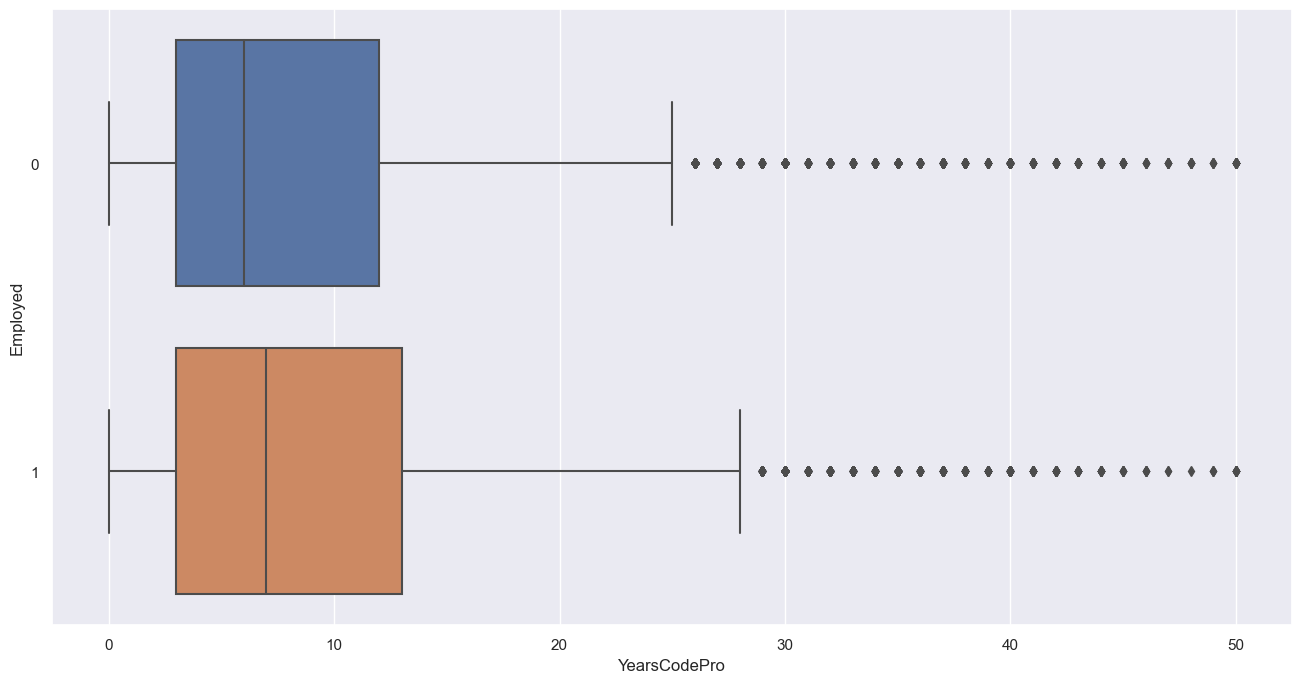

In [35]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'YearsCodePro', y = 'Employed', data = dataframe)

<Axes: xlabel='ComputerSkills', ylabel='Employed'>

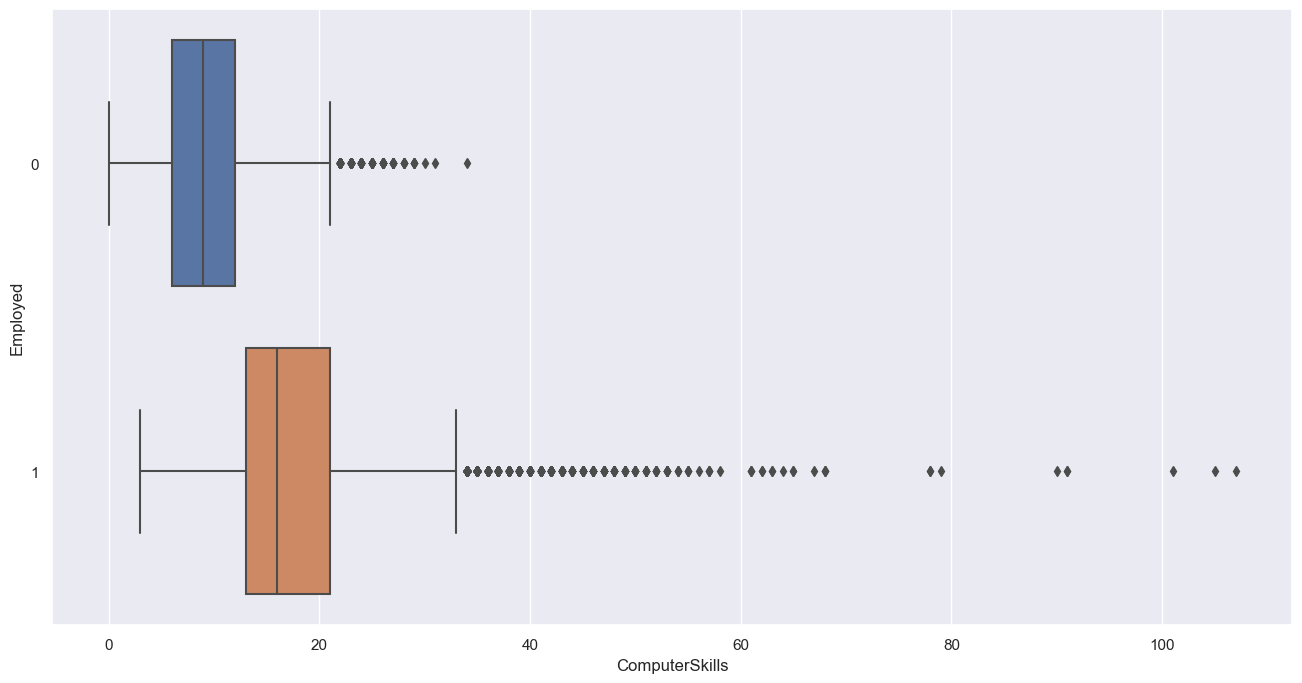

In [36]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'ComputerSkills', y = 'Employed', data = dataframe)

C:\Users\65978\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


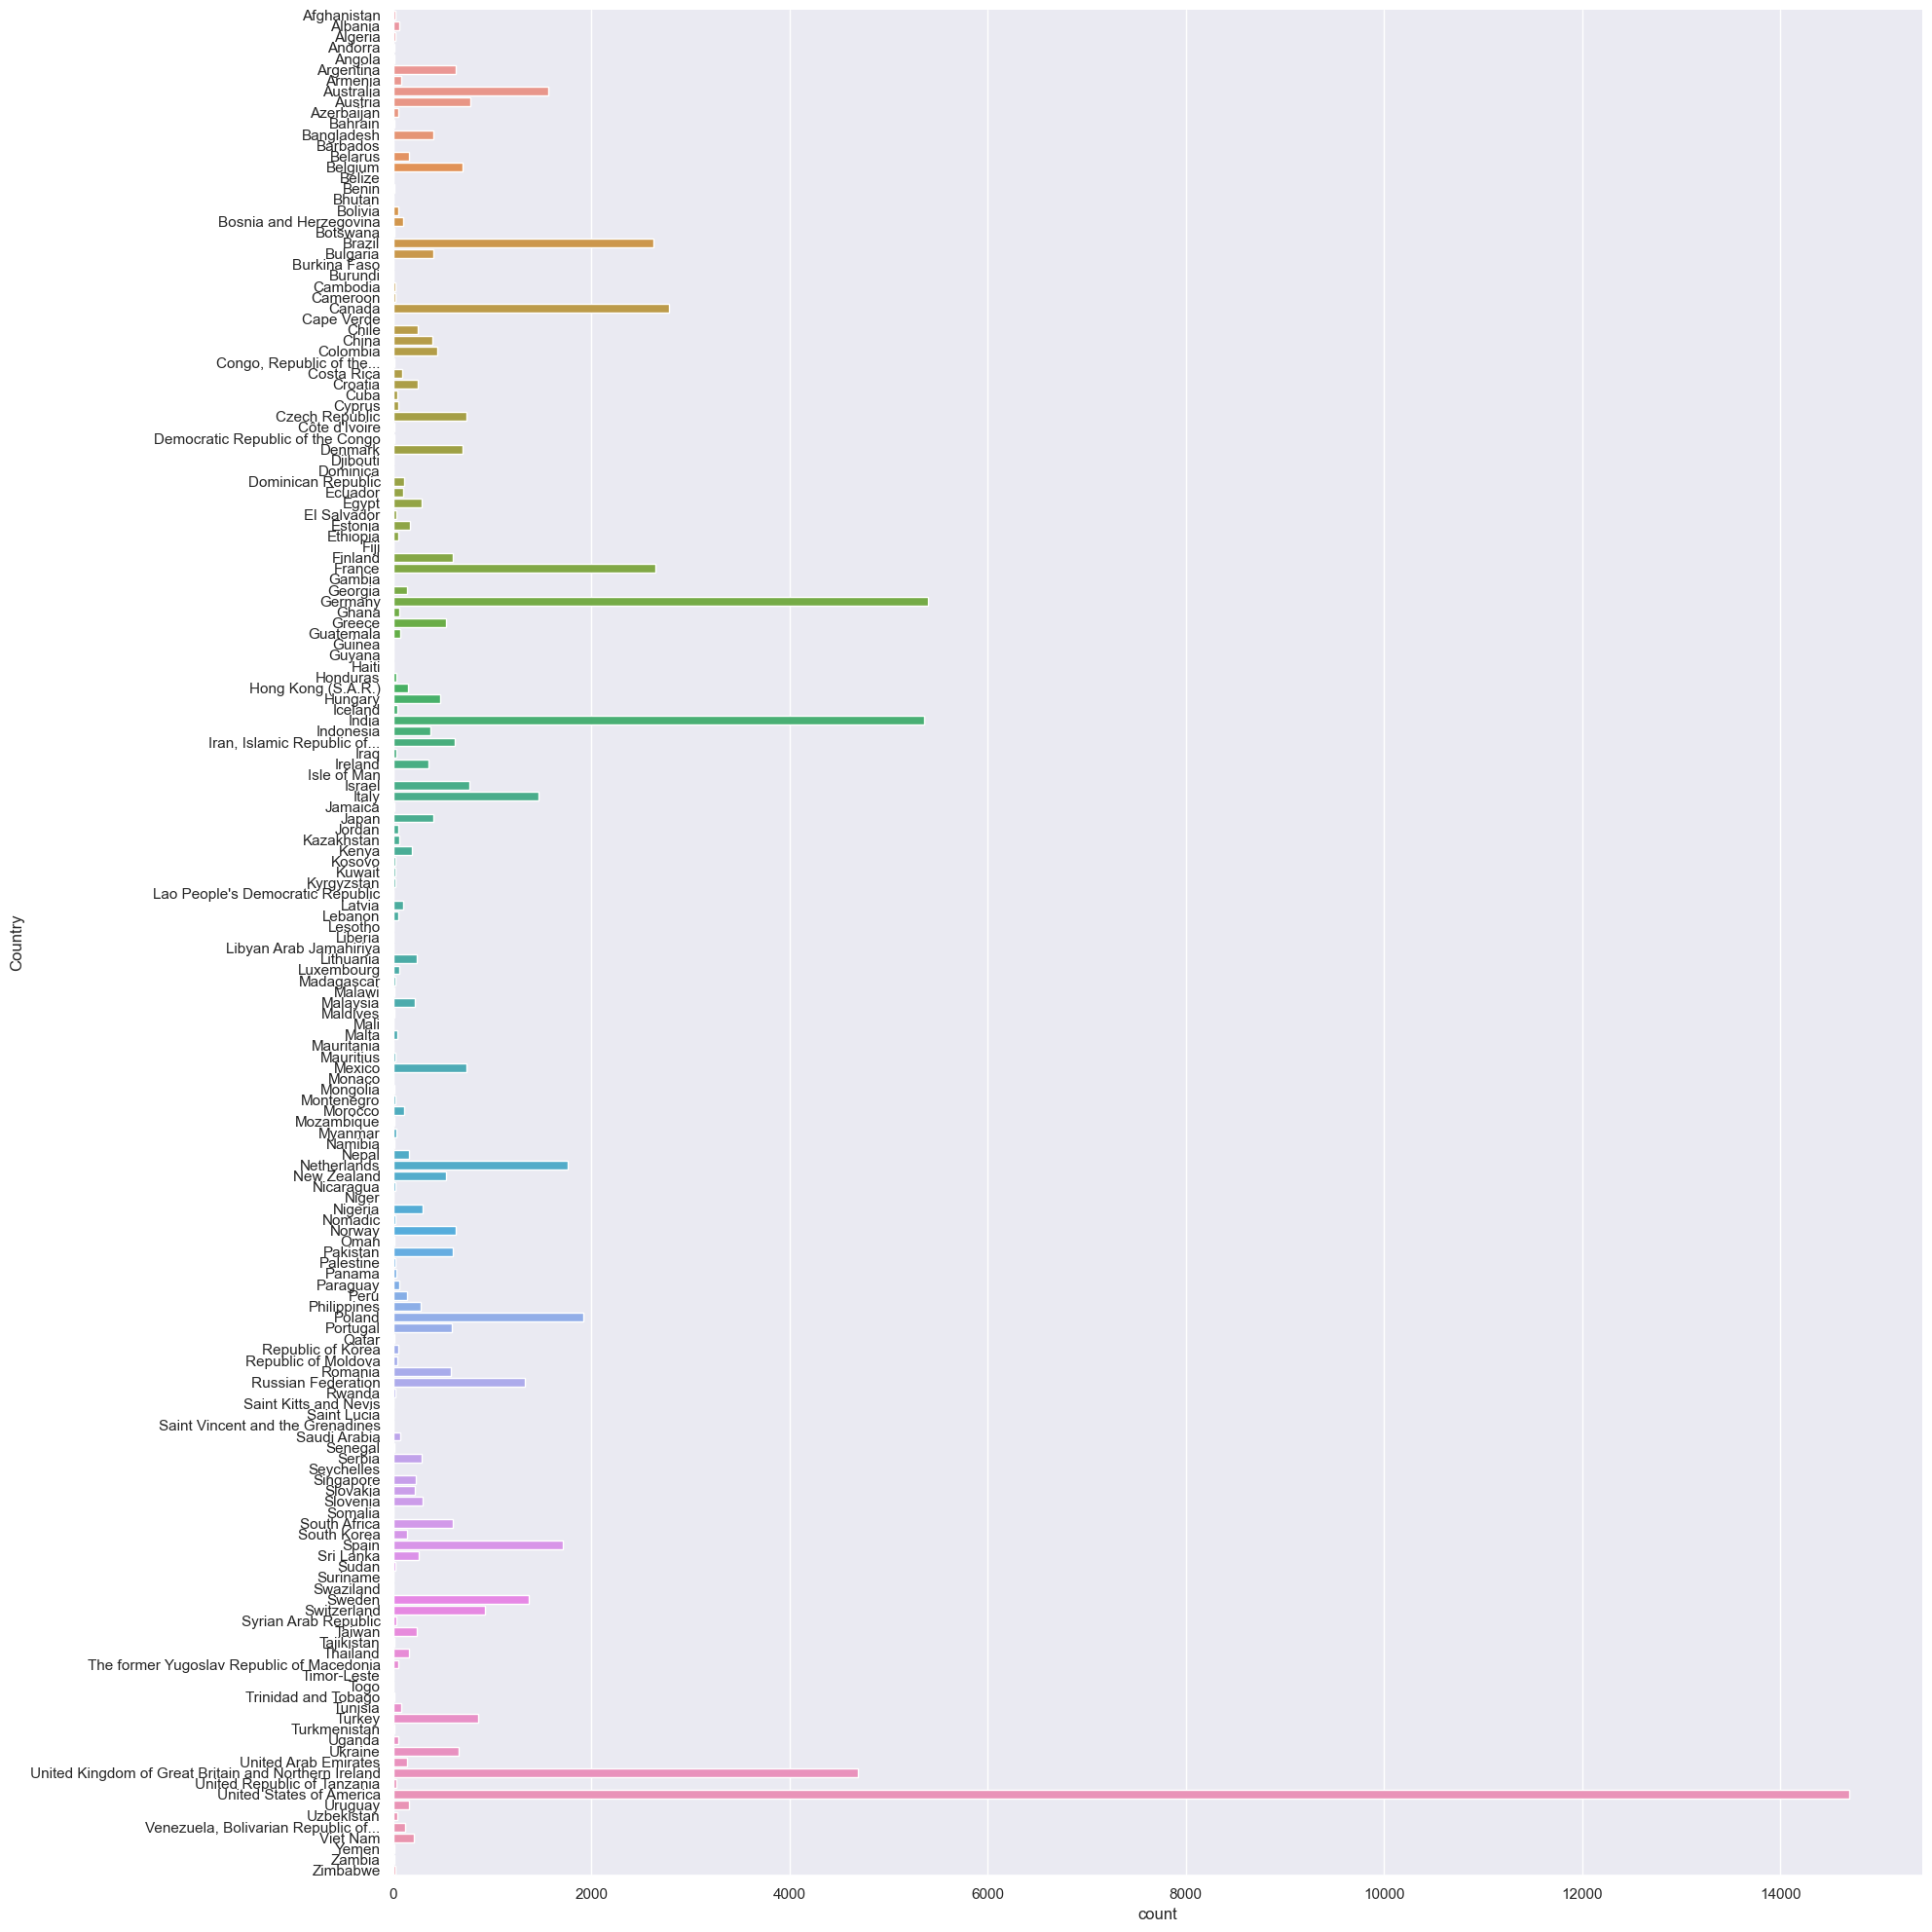

In [37]:
#catplot shows how many applicants there are in each country NOT the Number of people hired in each country
sb.catplot(y = 'Country', data = dataframe, kind = "count", height = 20)

# Trying to find out what is `Accessibility`

C:\Users\65978\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


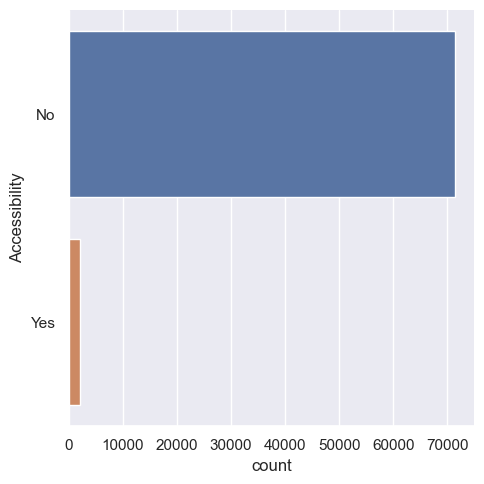

In [38]:
sb.catplot(y = "Accessibility", data = data, kind = "count")


<Axes: xlabel='Employed', ylabel='Accessibility'>

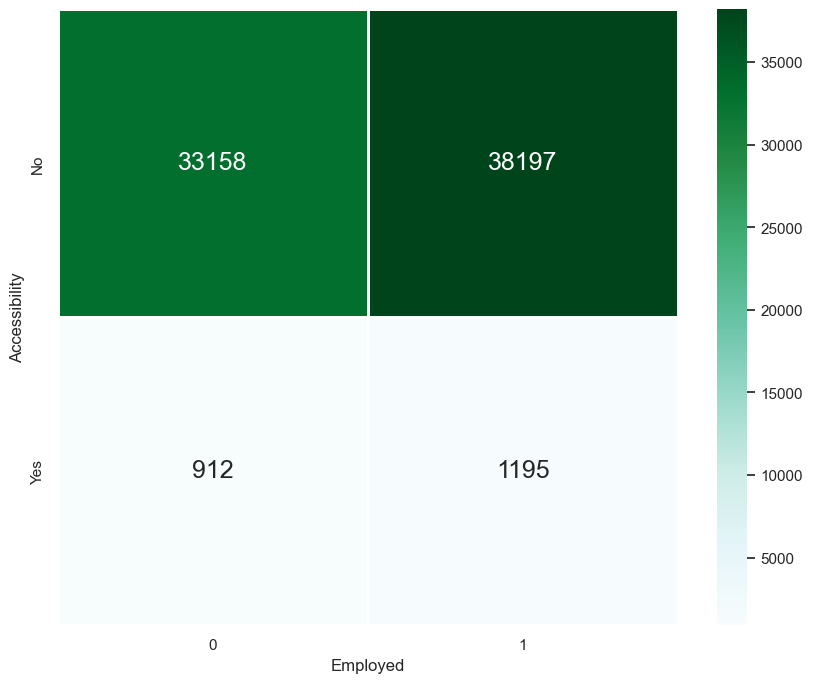

In [39]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sb.heatmap(dataframe.groupby(['Accessibility', 'Employed']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='Accessibility', ylabel='count'>

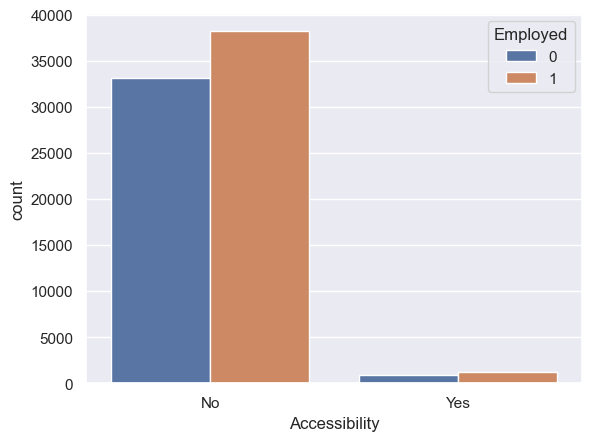

In [40]:
sb.countplot(dataframe, x="Accessibility",hue = "Employed")

the two visualisations above shows that the amount of people that said no to whether they are "willing to travel" will be hired or rejected by companies. We can see that it is roughly the same number of people that got rejected and hired with the data.

> `Accessibility`: "yes" - higher number of people employed 
> `Accessibility`: "no" - higher number of people employed 
> this could mean that this variable doesnt really affect if you get employed or not

`Accessibility` cld be whether they wanna travel elsewhere to work or not 

# exploring previous salary 

<Axes: xlabel='PreviousSalary', ylabel='Employed'>

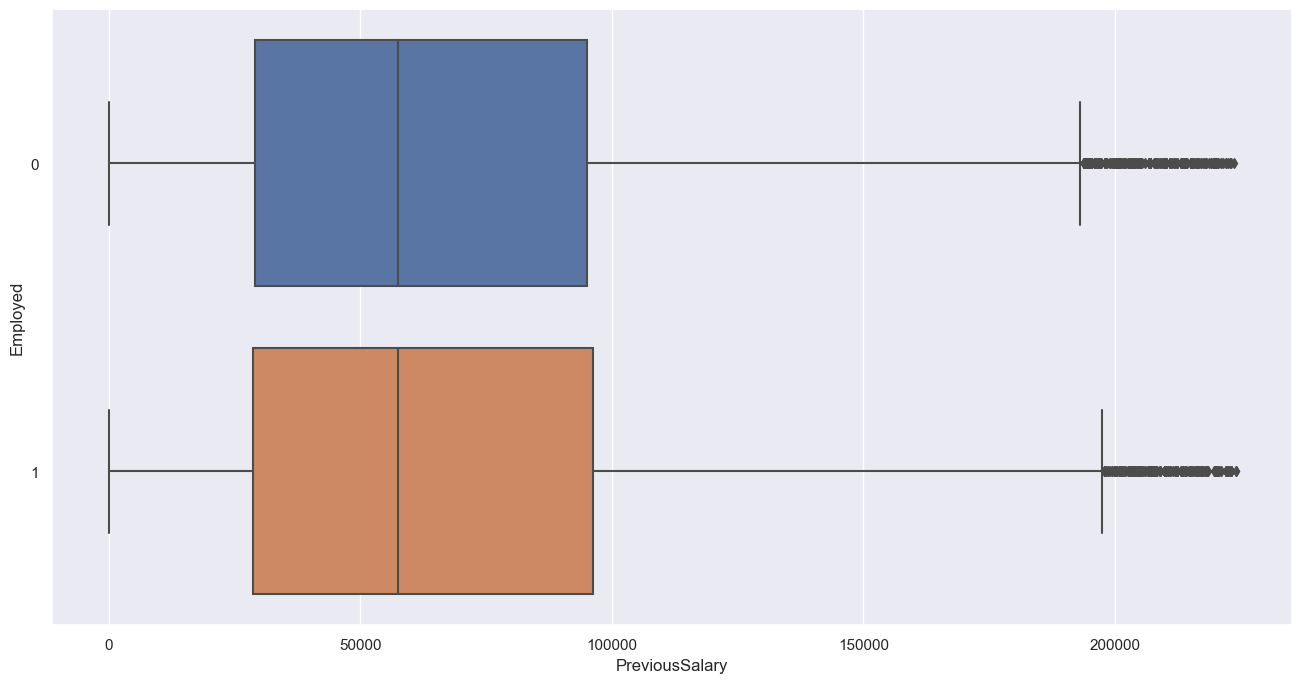

In [41]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'PreviousSalary', y = 'Employed', data = dataframe)

i dont think it gives us much info so we will remove it.


I took out the variables `Unnamed`:0 and `PreviousSalary` and created a new data frame "clean" with it. 
    
   `HaveWorkedWith` can be used together with `ComputerSkills` so we will remove it unless we want to find out which language is the most important
    

In [42]:
clean = pd.DataFrame(data[['Age', 'Accessibility', 'EdLevel', 
                           'Employment', 'Gender', 'MentalHealth',
                           'MainBranch', 'YearsCode','YearsCodePro',
                           'Country','ComputerSkills', 'Employed']])
clean.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,2,0


In [43]:
clean['Age'] = clean['Age'].astype('category')
clean['Accessibility'] = clean['Accessibility'].astype('category')
clean['EdLevel'] = clean['EdLevel'].astype('category')
clean['Employment'] = clean['Employment'].astype('category')
clean['Gender'] = clean['Gender'].astype('category')
clean['MentalHealth'] = clean['MentalHealth'].astype('category')
clean['MainBranch'] = clean['MainBranch'].astype('category')
clean['Country'] = clean['Country'].astype('category')
clean['Employed'] = clean['Employed'].astype('category')


In [44]:
clean.info()
clean.describe()
#feels like i cant tell much with the statistical summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             73462 non-null  category
 1   Accessibility   73462 non-null  category
 2   EdLevel         73462 non-null  category
 3   Employment      73462 non-null  category
 4   Gender          73462 non-null  category
 5   MentalHealth    73462 non-null  category
 6   MainBranch      73462 non-null  category
 7   YearsCode       73462 non-null  int64   
 8   YearsCodePro    73462 non-null  int64   
 9   Country         73462 non-null  category
 10  ComputerSkills  73462 non-null  int64   
 11  Employed        73462 non-null  category
dtypes: category(9), int64(3)
memory usage: 2.4 MB


,YearsCode,YearsCodePro,ComputerSkills
count,73462.000000,73462.000000,73462.000000
mean,14.218902,9.098377,13.428221
std,9.405172,7.960201,7.057835
min,0.000000,0.000000,0.000000
25%,7.000000,3.000000,8.000000
50%,12.000000,7.000000,13.000000
75%,20.000000,12.000000,17.000000
max,50.000000,50.000000,107.000000


# interesting relationships
> Age and Employment, does your age affect if you currently have a job ?
> `ComputerSkills` is something we definitely want to look at 
>`Employed` and `Employment`. maybe comapnies might not want to hire someone that is already in a job due to the fact that the the applicant has to give a one month notice before joining a new company 
>`Age` and `ComputerSkills` some young people may have more skills than older which makes them more attractive to be employed 


<Axes: xlabel='Employed', ylabel='Age'>

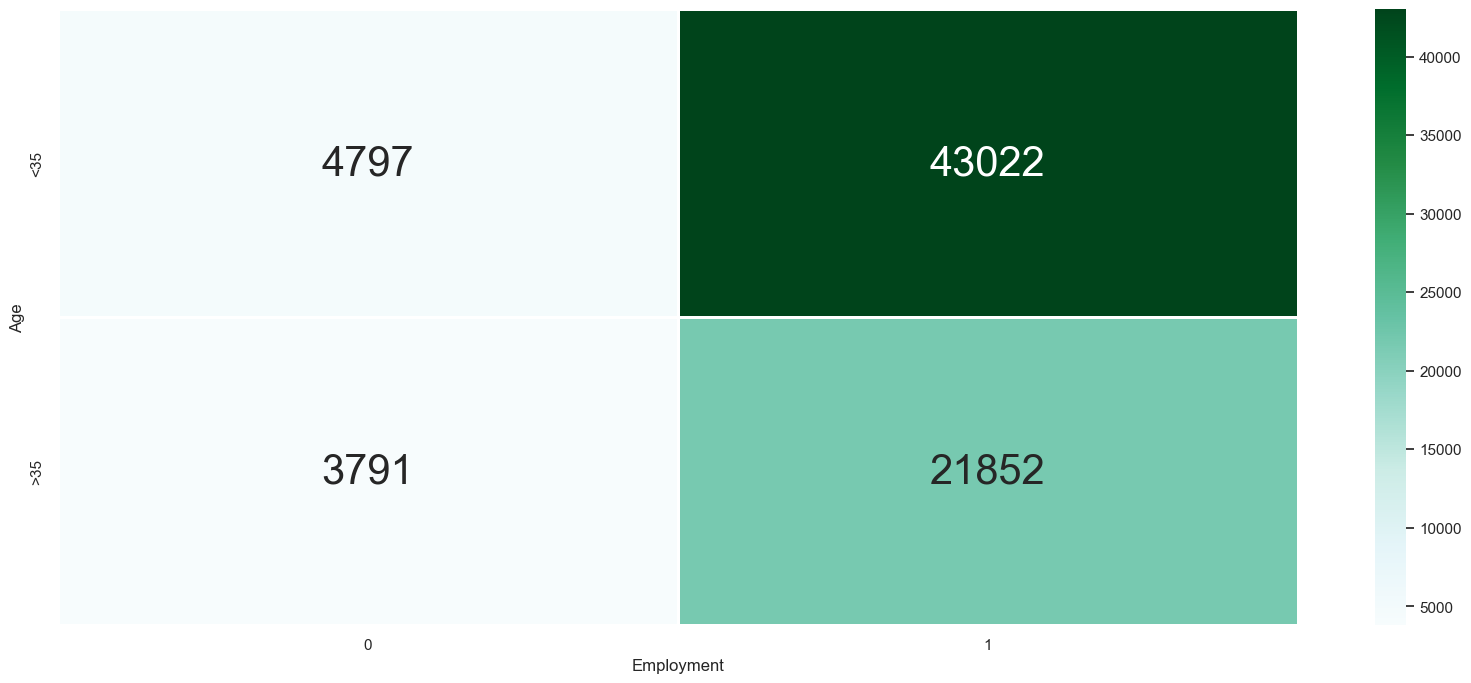

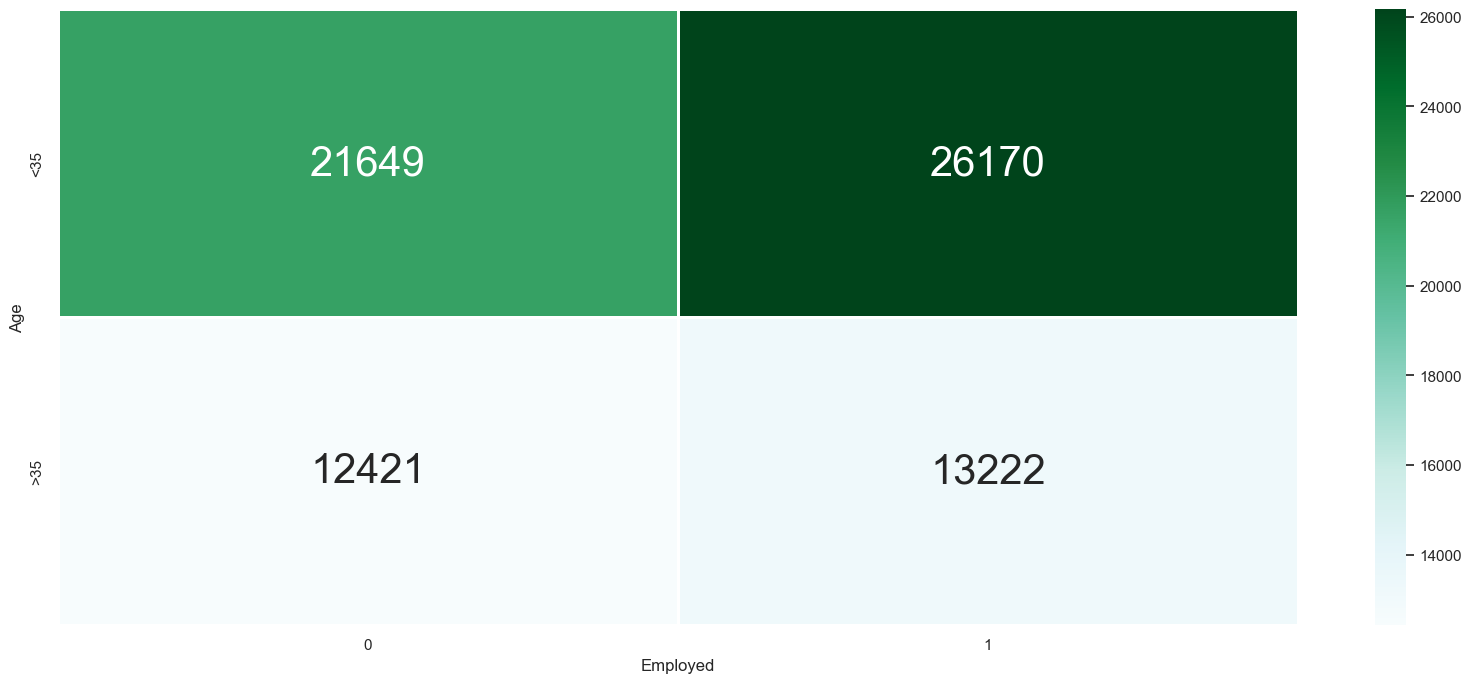

In [45]:
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(clean.groupby(['Age', 'Employment']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 30}, cmap = "BuGn")

f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(clean.groupby(['Age', 'Employed']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 30}, cmap = "BuGn")

<Axes: xlabel='ComputerSkills', ylabel='Employed'>

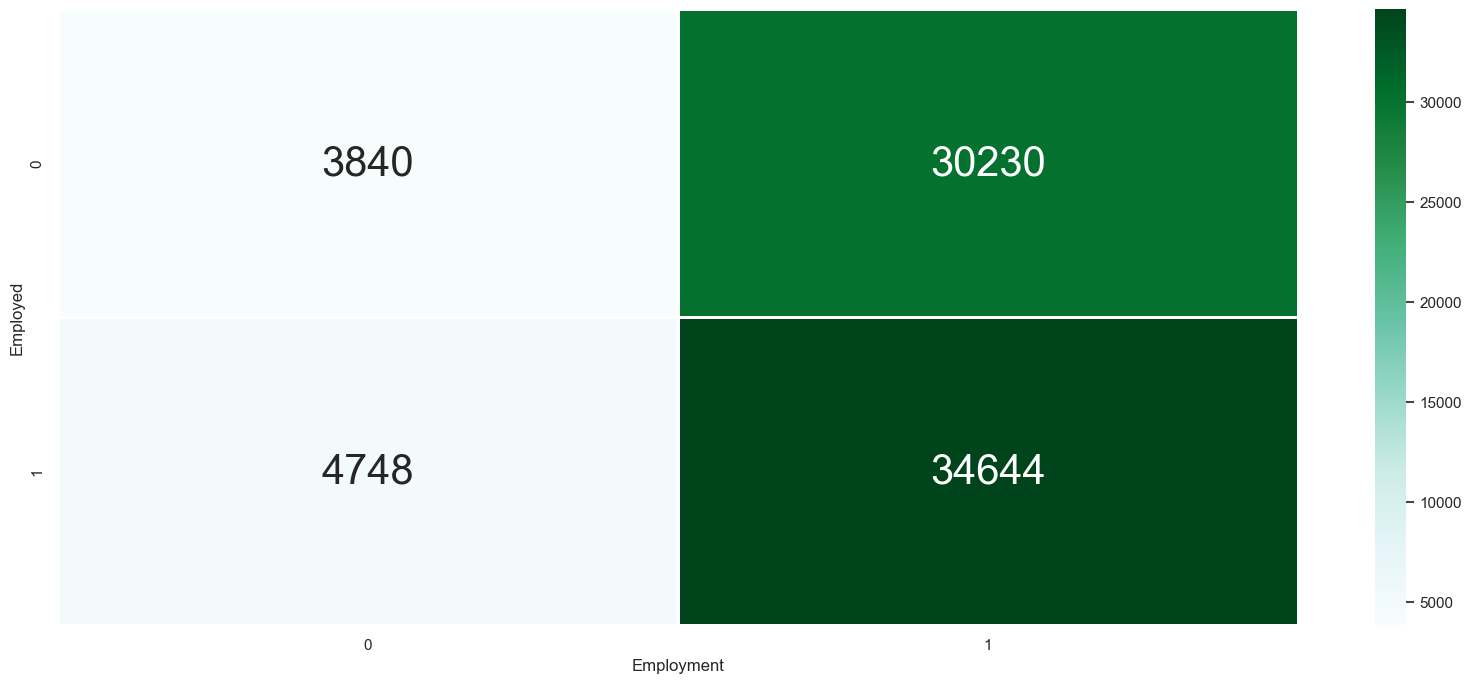

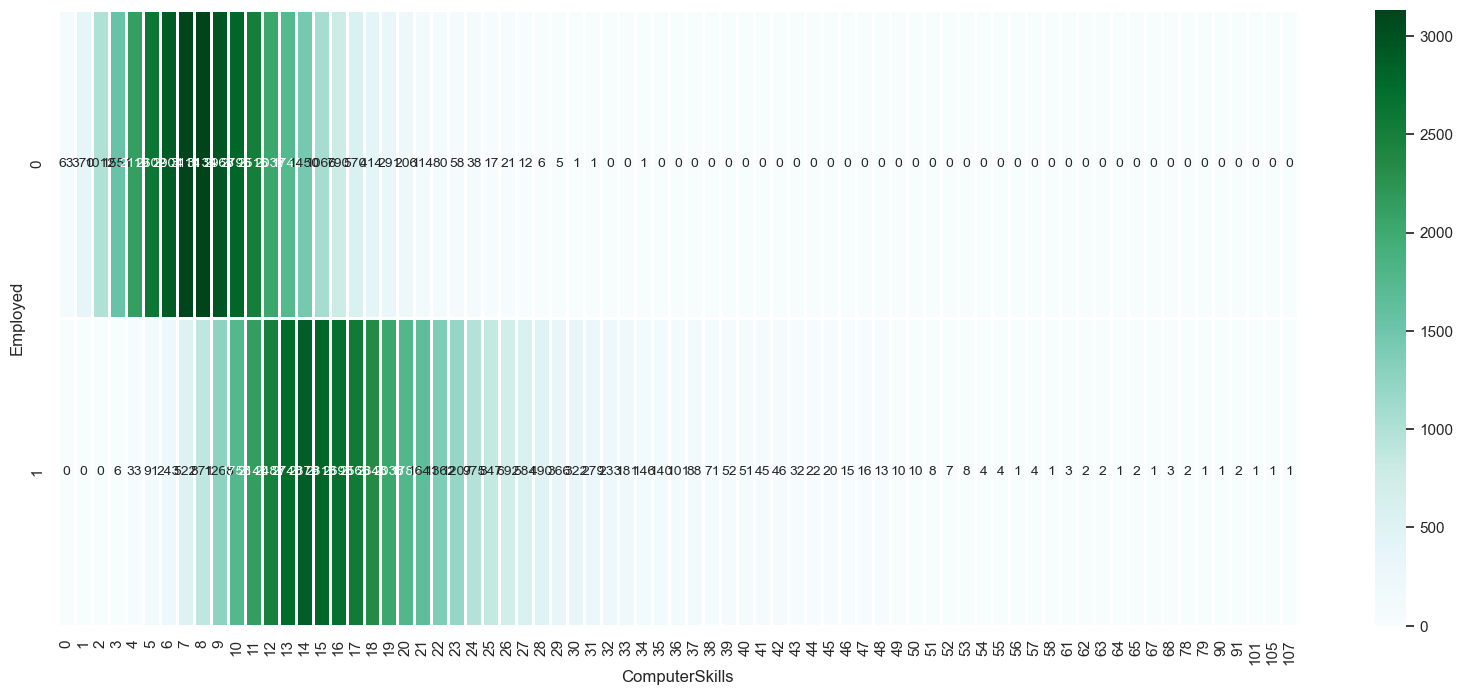

In [46]:
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(clean.groupby(['Employed', 'Employment']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 30}, cmap = "BuGn")

f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(clean.groupby(['Employed', 'ComputerSkills']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 10}, cmap = "BuGn")

<Axes: xlabel='Age', ylabel='ComputerSkills'>

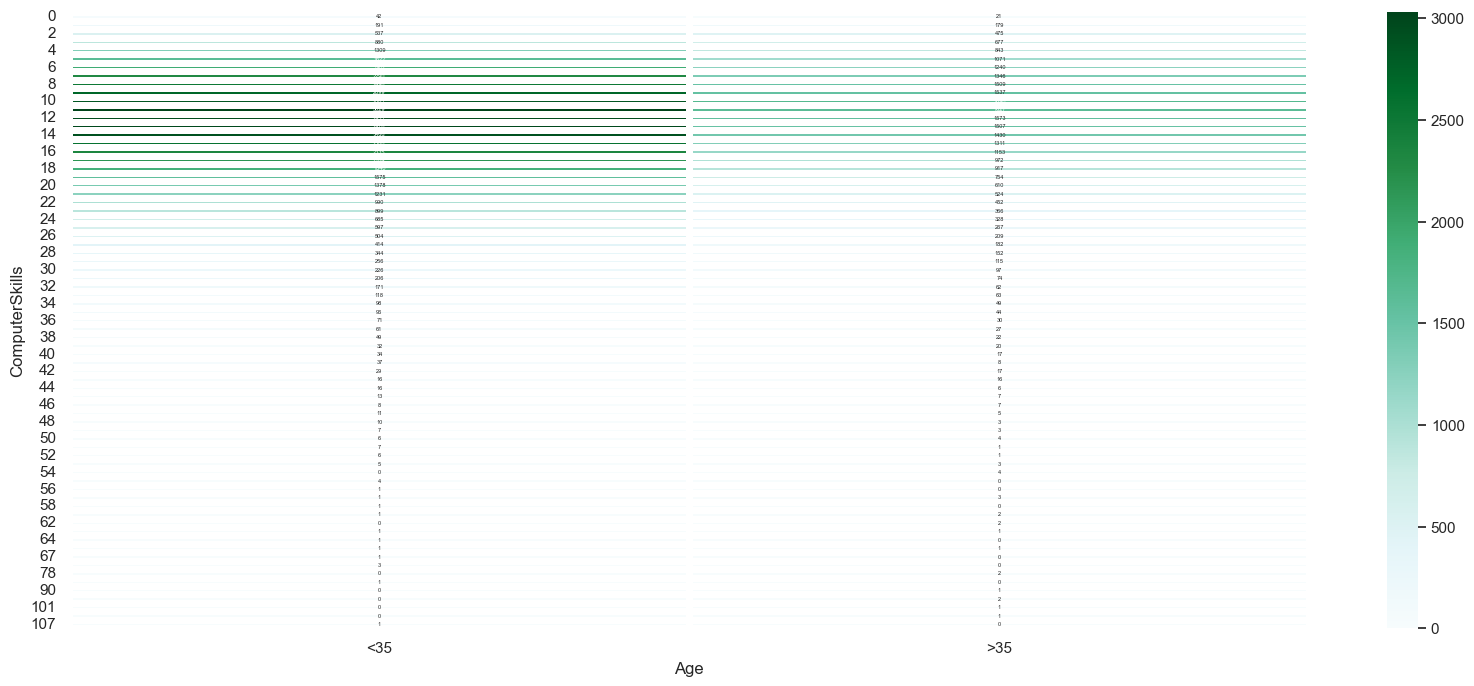

In [47]:
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(clean.groupby(['ComputerSkills', 'Age']).size().unstack(), 
           linewidths = 5, annot = True, fmt = 'g', annot_kws = {"size": 4}, cmap = "BuGn")


<Axes: xlabel='Country', ylabel='count'>

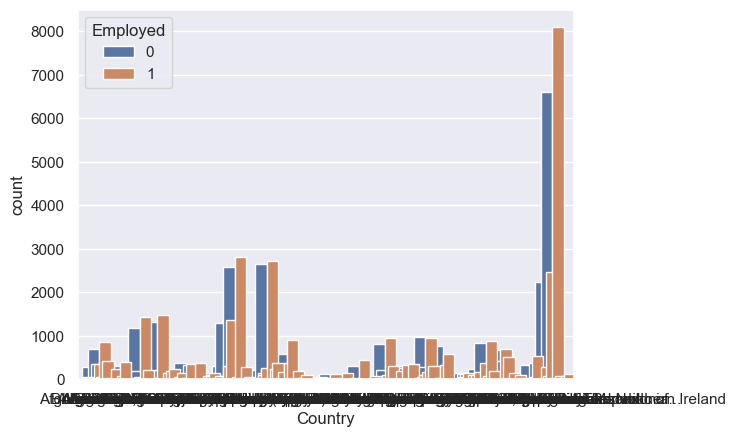

In [48]:
sb.countplot(dataframe, x="Country",hue = "Employed", width = 8)

>you can see that the variable for `country` is highly varied. So we can probably consider this also in seeing which variable is most important. 
>my best guess is certain countries, for example, India may have cheaper labour/lesser salary in general than the United States and therefore some companies may view the cheaper salary as a more attractive reason to hire them. 

>`Education Level`: Generally, higher levels of education are associated with higher employment rates. Individuals with advanced degrees or specialized training may have better job prospects.

>`Country`: people from different countries have different expectations for their salary and therefore companies may value those people instead. 

>`YearsCodePro`: The amount and type of work experience can impact employment status. Individuals with relevant work experience in their field may be more likely to be employed.

>`Age`: Age can be a significant factor in predicting employment status. Younger individuals may be more likely to be employed in entry-level positions, while older individuals may face age-related challenges in the job market.

>`ComputerSkills`: Specific skills and qualifications relevant to the job market can influence employment status. For example, proficiency in certain programming languages may increase employability in the technology sector.

>`Gender`: In some contexts, gender and ethnicity can influence employment opportunities due to factors such as discrimination, biases, or societal norms.

>`MentalHealth`: Health status and disabilities can impact employment opportunities. Individuals with disabilities may face barriers to employment and require accommodations in the workplace.

>`Employment`: some companies may need to hire immediately and as such people who are not currently employed might be selected as they do not have to serve their "notice" before going to their new company


# variables that might help us to predict if the person will be hired or not 

> `ComputerSkills` and `Country` highest variation in the boxplot 
>`YearsCodePro`and `Edlevel` moderately important variables 
>`Age` `MentalHealth`, `Gender`, `Employment` not clear if they are important but i feel that they are worth exploring 

---
# Univariate Predictions
Univariate analysis involves examining the relationship between each individual feature (predictor) and the target variable (employability) separately. This can provide valuable insights into the predictive power of individual features and help identify which features are most strongly associated with employability.

Benefits:
>Univariate analysis can help identify the most relevant features for predicting employability. Features with strong individual associations with the target variable can be prioritized for inclusion in multivariate models, while less informative features can be excluded, reducing model complexity and potentially improving performance.

>Univariate analysis allows for a deeper understanding of the relationships between individual features and employability. It can uncover potential patterns, trends, and correlations that may not be apparent when considering multiple features simultaneously.

>Univariate predictions can serve as a baseline for evaluating the performance of more complex multivariate models. Comparing the performance of univariate models with that of multivariate models can help assess the incremental predictive power gained by including additional features.

#### Predictors: `Age`, `EdLevel`,`Employment`, `Gender`, `MentalHealth`,`YearsCodePro`,`Country`, and `ComputerSkills`
Since some of the predictors are categorical variables, we need to encode them into dummy variables because many machine learning algorithms cannot directly handle categorical variables as inputs, and instead require numerical inputs.


In [49]:
unidata = pd.DataFrame(clean[['Age', 'EdLevel','Employment', 'Gender', 'MentalHealth','YearsCodePro',
                           'Country','ComputerSkills', 'Employed']])
unidata.head()

,Age,EdLevel,Employment,Gender,MentalHealth,YearsCodePro,Country,ComputerSkills,Employed
0,<35,Master,1,Man,No,4,Sweden,4,0
1,<35,Undergraduate,1,Man,No,5,Spain,12,1
2,<35,Master,1,Man,No,6,Germany,7,0
3,<35,Undergraduate,1,Man,No,6,Canada,13,0
4,>35,PhD,0,Man,No,30,Singapore,2,0


#### Univariate Predictions of Categorical Predictors

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the predictors and target variable
# Replace 'data' with the actual name of your DataFrame

# Step 1: Encode Categorical Variables
unidata_encoded = pd.get_dummies(unidata, columns=['Age','EdLevel', 'Employment', 'Gender', 'MentalHealth', 'Country'])

# Step 2: Prepare Data
X = unidata_encoded.drop(columns=['YearsCodePro', 'ComputerSkills','Employed'])  # Predictor matrix
y = unidata_encoded['Employed']  # Target variable (assuming 'Employed' indicates employment status)

# Step 3: Train Models and Evaluate Performance
univariate_results = {}  # Dictionary to store accuracies

for predictor in X.columns:
    X_predictor = X[[predictor]]  # Selecting only the predictor
    
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_predictor, y)
    
    # Make predictions
    y_pred = model.predict(X_predictor)
    
    # Evaluate model performance
    accuracy = accuracy_score(y, y_pred)
    
    print(f"{predictor} Accuracy: ",accuracy)
    
    # Store results
    univariate_results[predictor] = accuracy


Age_<35 Accuracy:  0.5362228090713567
Age_>35 Accuracy:  0.5362228090713567
EdLevel_Master Accuracy:  0.5434782608695652
EdLevel_NoHigherEd Accuracy:  0.5362228090713567
EdLevel_Other Accuracy:  0.5362228090713567
EdLevel_PhD Accuracy:  0.5513871117040102
EdLevel_Undergraduate Accuracy:  0.5362228090713567
Employment_0 Accuracy:  0.5362228090713567
Employment_1 Accuracy:  0.5362228090713567
Gender_Man Accuracy:  0.5398845661702649
Gender_NonBinary Accuracy:  0.5362228090713567
Gender_Woman Accuracy:  0.5411233018431297
MentalHealth_No Accuracy:  0.5362228090713567
MentalHealth_Yes Accuracy:  0.5362228090713567
Country_Afghanistan Accuracy:  0.5362228090713567
Country_Albania Accuracy:  0.5362228090713567
Country_Algeria Accuracy:  0.5362636465111214
Country_Andorra Accuracy:  0.5362228090713567
Country_Angola Accuracy:  0.5362228090713567
Country_Argentina Accuracy:  0.5362228090713567
Country_Armenia Accuracy:  0.5362228090713567
Country_Australia Accuracy:  0.5362228090713567
Country

Country_United Arab Emirates Accuracy:  0.5362228090713567
Country_United Kingdom of Great Britain and Northern Ireland Accuracy:  0.5362228090713567
Country_United Republic of Tanzania Accuracy:  0.5362228090713567
Country_United States of America Accuracy:  0.5362228090713567
Country_Uruguay Accuracy:  0.5362228090713567
Country_Uzbekistan Accuracy:  0.5363180964308077
Country_Venezuela, Bolivarian Republic of... Accuracy:  0.5362228090713567
Country_Viet Nam Accuracy:  0.5362228090713567
Country_Yemen Accuracy:  0.5362364215512783
Country_Zambia Accuracy:  0.5362228090713567
Country_Zimbabwe Accuracy:  0.5362228090713567


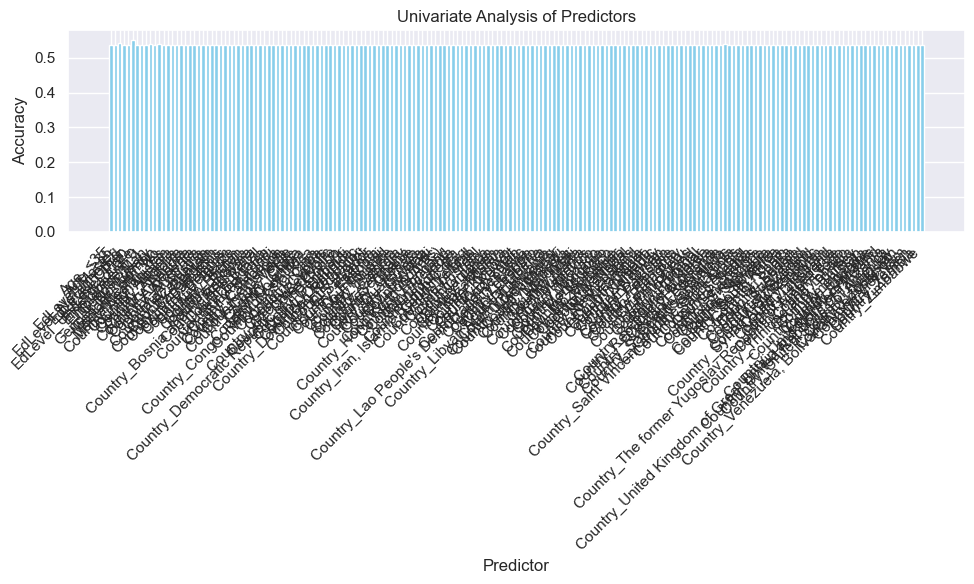

In [51]:
# Step 4: Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(univariate_results.keys(), univariate_results.values(), color='skyblue')
plt.xlabel('Predictor')
plt.ylabel('Accuracy')
plt.title('Univariate Analysis of Predictors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The accuracy for all of the categorical predictors seems very similar here. The nature of the data or the relationship between predictors and the target variable may result in similar predictive power for each categorical predictor. This could happen if the predictors have similar distributions or if the relationship between each predictor and the target is consistent across all predictors.

#### Univariate Predictions of Numeric Variables

YearsCodePro Accuracy:  0.5362228090713567
ComputerSkills Accuracy:  0.7781165772780485


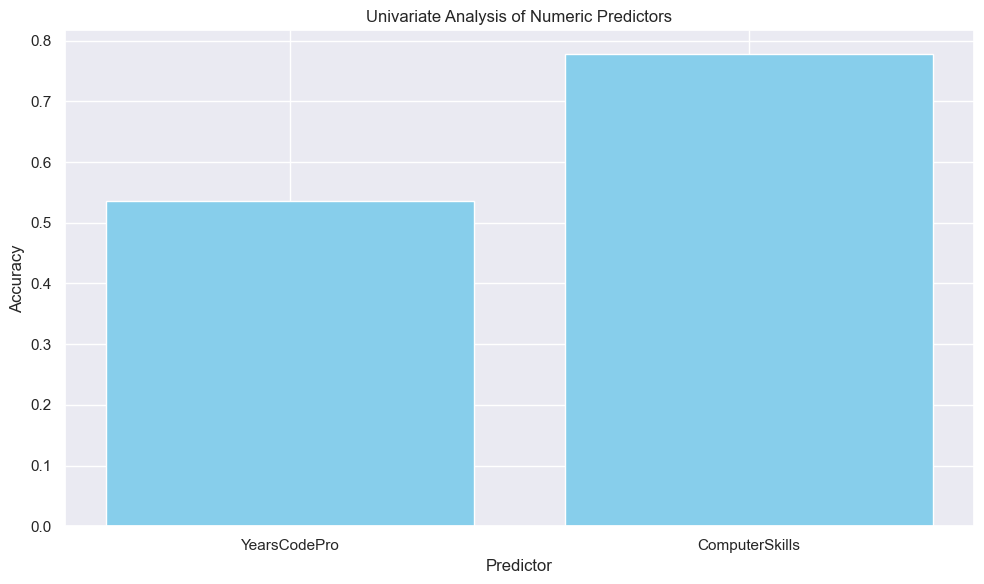

In [52]:
X_numeric = unidata[['YearsCodePro', 'ComputerSkills']]  # Numeric predictors
y = unidata['Employed']  # Target variable

univariate_results = {}  # Dictionary to store accuracies

for predictor in X_numeric.columns:
    X_predictor = X_numeric[[predictor]]  # Selecting only the predictor
    
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_predictor, y)
    
    # Make predictions
    y_pred = model.predict(X_predictor)
    
    # Evaluate model performance
    accuracy = accuracy_score(y, y_pred)
    
    print(f"{predictor} Accuracy: ",accuracy)
    
    # Store results
    univariate_results[predictor] = accuracy

# Step 3: Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(univariate_results.keys(), univariate_results.values(), color='skyblue')
plt.xlabel('Predictor')
plt.ylabel('Accuracy')
plt.title('Univariate Analysis of Numeric Predictors')
plt.tight_layout()
plt.show()

The accuracy of prediction using 'YearsCodePro' seems similar to the accuracy of the categorical predictors as well. 

However, 'ComputerSkills' is showing a higher accuracy compared to other predictors. This suggests that 'ComputerSkills' might be the strongest indicator of employment status in our dataset.

---
# Multivariate Model Selection
Experiment with different algorithms such as logistic regression, decision trees, random forests, etc. to choose appropriate machine learning models for binary classification tasks. Evaluate the models using appropriate performance metrics such as accuracy. We will use all of the variables that we think is worth exploring here.


### Data Preparation: Converting Categorical Features
To perform prediction, we need to change the categorical variables to a format that our model will understand. We can do this by encoding the categorical variables. First, we’ll double-check which features are categorical:

In [53]:
multidata = pd.DataFrame(clean[['Age', 'EdLevel','Employment', 'Gender', 'MentalHealth','YearsCodePro',
                           'Country','ComputerSkills', 'Employed']])
multidata.head()

,Age,EdLevel,Employment,Gender,MentalHealth,YearsCodePro,Country,ComputerSkills,Employed
0,<35,Master,1,Man,No,4,Sweden,4,0
1,<35,Undergraduate,1,Man,No,5,Spain,12,1
2,<35,Master,1,Man,No,6,Germany,7,0
3,<35,Undergraduate,1,Man,No,6,Canada,13,0
4,>35,PhD,0,Man,No,30,Singapore,2,0


In [54]:
multidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             73462 non-null  category
 1   EdLevel         73462 non-null  category
 2   Employment      73462 non-null  category
 3   Gender          73462 non-null  category
 4   MentalHealth    73462 non-null  category
 5   YearsCodePro    73462 non-null  int64   
 6   Country         73462 non-null  category
 7   ComputerSkills  73462 non-null  int64   
 8   Employed        73462 non-null  category
dtypes: category(7), int64(2)
memory usage: 1.7 MB


Encode the categorical variables using one-hot encoding. 
This will convert each categorical variable into a set of binary (0 or 1) variables.
Split the dataset into training and testing sets.

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler 

X = multidata.drop(columns=['Employed'])  # Assuming 'employability' is the target variable
y = multidata['Employed']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)  # Drop first category to avoid multicollinearity
X_encoded = encoder.fit_transform(X)

# Scale the encoded features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

C:\Users\65978\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
# Besides accuracy, we will also need precision, recall, and F1-score to gain a more nuanced understanding of model performance
from sklearn.metrics import precision_score, recall_score, f1_score

---
## 1) Logistic Regression 

Logistic regression predicts the probability of a binary outcome. A new observation is predicted to be within the class if its probability is above a set threshold. There are methods to use Logistic Regression for scenarios where there are multiple classes.

Since our predicted results will be either 'employed' or 'unemployed', I believe that it will be a binary outcome.

Now we will be using **Logistic Regression Technique**.

Training Set 
	Accuracy: 0.7846824005853427
	Precision: 0.7834930745425592
	Recall: 0.8271847739888977
	F1-score: 0.8047463276138748


<Axes: >

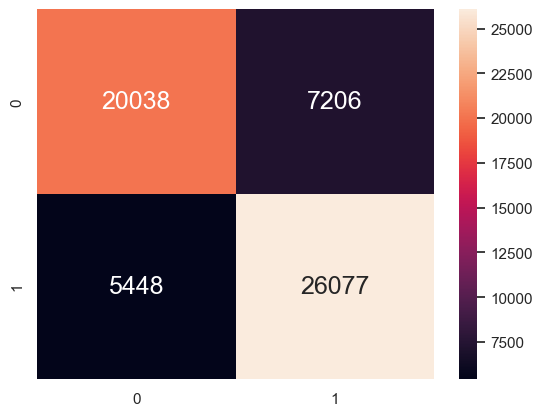

In [57]:
# Fit logistic regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate model performance
accuracy1 = accuracy_score(y_train, y_pred_train)
print("Training Set \n\tAccuracy:", accuracy1)

# Calculate precision
precision = precision_score(y_train, y_pred_train)

# Calculate recall
recall = recall_score(y_train, y_pred_train)

# Calculate F1-score
f1 = f1_score(y_train, y_pred_train)

print("\tPrecision:", precision)
print("\tRecall:", recall)
print("\tF1-score:", f1)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_pred_train), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Testing Set 
	Accuracy: 0.786292792486218
	Precision: 0.7886893856113351
	Recall: 0.8207703063429516
	F1-score: 0.804410115858976


<Axes: >

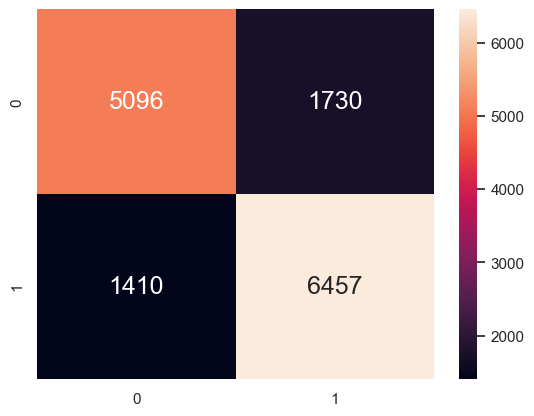

In [58]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
LRaccuracy = accuracy_score(y_test, y_pred)
print("Testing Set \n\tAccuracy:", LRaccuracy)

# Calculate precision
LRprecision = precision_score(y_test, y_pred)

# Calculate recall
LRrecall = recall_score(y_test, y_pred)

# Calculate F1-score
LRf1 = f1_score(y_test, y_pred)

print("\tPrecision:", LRprecision)
print("\tRecall:", LRrecall)
print("\tF1-score:", LRf1)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

>Accuracy represents the proportion of correctly predicted outcomes (employable or non-employable) by the model. For employability prediction, accuracy tells us how often the model correctly predicts whether a person is employed or not based on the features provided.

>>Our model achieves an accuracy of about 78.62% on our training set, it means that it correctly predicts employability 78.62% of the time on unseen data. However, it's essential to consider whether this level of accuracy is satisfactory for our specific use case.

---
## 2) Decison Tree Classification

Decision Tree classifiers can handle categorical predictors naturally without requiring them to be encoded as dummy variables. Decision Trees split the data based on the values of the predictors, regardless of whether they are categorical or numerical. This is true in theory, but in implementation we should try one hot encoding for categorical features before training or testing the model. Always keep in mind that the ML model understands nothing but numbers.


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier(random_state = 42)

# Fit the decision tree classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = classifier.predict(X_train)

# Evaluate model performance
accuracy = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

Training Set Accuracy: 0.9298269495822628

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     27244
           1       0.95      0.91      0.93     31525

    accuracy                           0.93     58769
   macro avg       0.93      0.93      0.93     58769
weighted avg       0.93      0.93      0.93     58769



In [60]:
# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate model performance
DTaccuracy = accuracy_score(y_test, y_pred)
print("Testing Set Accuracy:", DTaccuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision
DTprecision = precision_score(y_test, y_pred)

# Calculate recall
DTrecall = recall_score(y_test, y_pred)

# Calculate F1-score
DTf1 = f1_score(y_test, y_pred)

Testing Set Accuracy: 0.7261280882052679

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      6826
           1       0.75      0.73      0.74      7867

    accuracy                           0.73     14693
   macro avg       0.73      0.73      0.73     14693
weighted avg       0.73      0.73      0.73     14693



The accuracy of the decision tree model on our training set is approximately 92.98% while on testing set is approximately 72.61%. This indicates that the model correctly predicts employability or non-employability for around 72.61% of the samples in the test dataset.

>Precision and Recall:

>>For the "Not Employed" class (class 0), the precision is 0.70 and the recall is 0.73. This means that out of all instances predicted as "Not Employed", 70% are actually "Not Employed", and the model correctly identifies 73% of all "Not Employed" instances.

>>For the "Employed" class (class 1), the precision is 0.75 and the recall is 0.73. This means that out of all instances predicted as "Employed", 75% are actually "Employed", and the model correctly identifies 73% of all "Employed" instances.

>F1-score: The F1-score is a harmonic mean of precision and recall and provides a single metric to evaluate the model's performance. The F1-score for both classes is approximately 0.71 for class 0 ("Not Employed") and 0.74 for class 1 ("Employed").

>Support: The support represents the number of actual occurrences of each class in the test dataset. In this case, there are 6,826 instances of class 0 ("Not Employed") and 7,867 instances of class 1 ("Employed").

>Macro Average and Weighted Average: The macro average calculates the average of precision, recall, and F1-score across all classes without considering class imbalance. The weighted average calculates the average, taking into account the number of samples for each class.

Overall, the decision tree model appears to perform reasonably well with balanced precision and recall scores for both classes. 

---
## 3) Random Forest Prediction
Performing Random Forest prediction is quite similar to Decision Tree classification, as Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions.

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = random_forest.predict(X_train)

# Calculate the accuracy of the model
accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train Set \nRandom Forest Accuracy:", accuracy1)

# Calculate precision
precision = precision_score(y_train, y_pred_train)

# Calculate recall
recall = recall_score(y_train, y_pred_train)

# Calculate F1-score
f1 = f1_score(y_train, y_pred_train)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Train Set 
Random Forest Accuracy: 0.9297929180350185
Precision: 0.9306799962274828
Recall: 0.9390642347343379
F1-score: 0.9348533173335017


In [62]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the model
RFaccuracy = accuracy_score(y_test, y_pred)
print("Test Set \nRandom Forest Accuracy:", RFaccuracy)

# Calculate precision
RFprecision = precision_score(y_test, y_pred)

# Calculate recall
RFrecall = recall_score(y_test, y_pred)

# Calculate F1-score
RFf1 = f1_score(y_test, y_pred)

print("Precision:", RFprecision)
print("Recall:", RFrecall)
print("F1-score:", RFf1)

Test Set 
Random Forest Accuracy: 0.7626761042673382
Precision: 0.7697708795269771
Recall: 0.7943307486970891
F1-score: 0.7818579918673757


---
## Comparing Performances of Different Models
We will plot bar graphs to compare accuracy, precision, recall, and F1-score of different models respectively. (Only the test sets' results are considered here.)

#### Accuracy

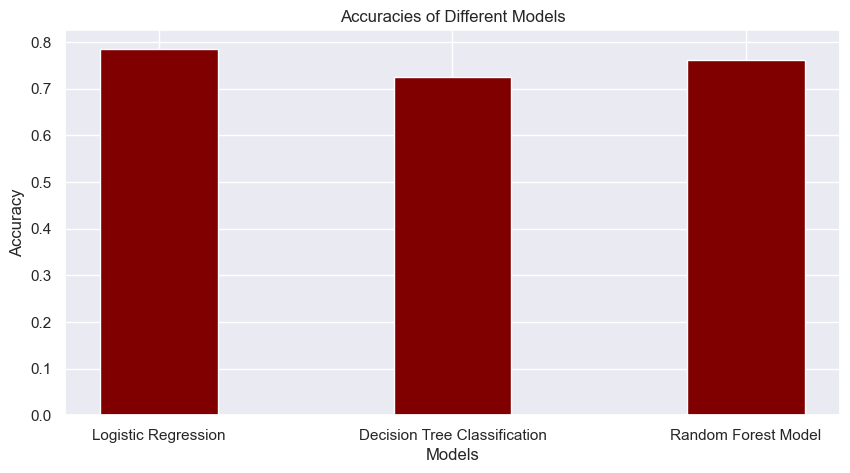

In [63]:
# creating the dataset
acc_set = {'Logistic Regression':LRaccuracy, 'Decision Tree Classification':DTaccuracy, 'Random Forest Model':RFaccuracy}
models = list(acc_set.keys())
values = list(acc_set.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracies of Different Models")
plt.show()

#### Precision

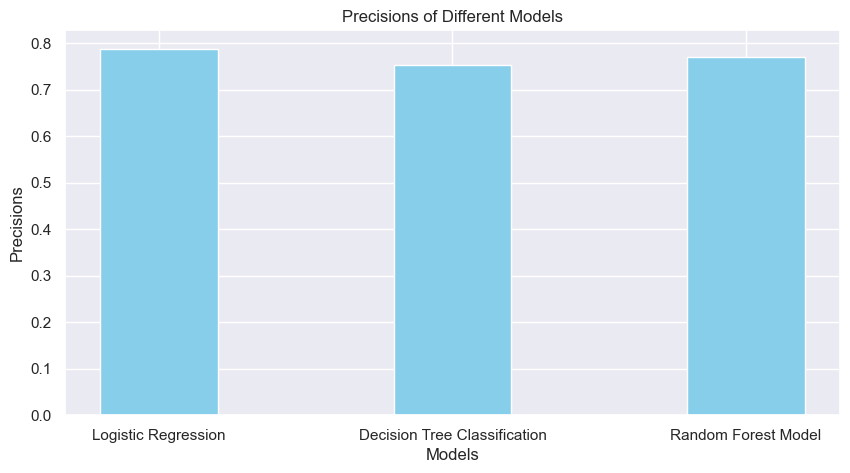

In [64]:
# creating the dataset
pre_set = {'Logistic Regression':LRprecision, 'Decision Tree Classification':DTprecision, 'Random Forest Model':RFprecision}
models = list(pre_set.keys())
values = list(pre_set.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Precisions")
plt.title("Precisions of Different Models")
plt.show()

#### Recall

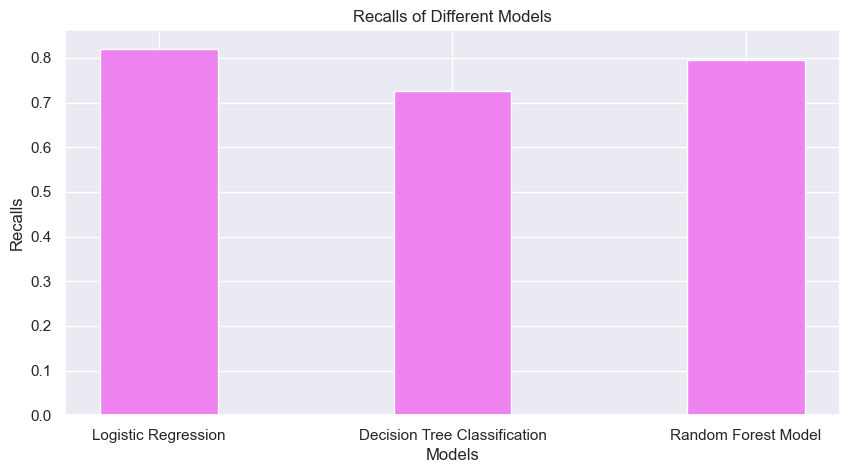

In [65]:
# creating the dataset
rec_set = {'Logistic Regression':LRrecall, 'Decision Tree Classification':DTrecall, 'Random Forest Model':RFrecall}
models = list(rec_set.keys())
values = list(rec_set.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='violet', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Recalls")
plt.title("Recalls of Different Models")
plt.show()

#### F1-Score

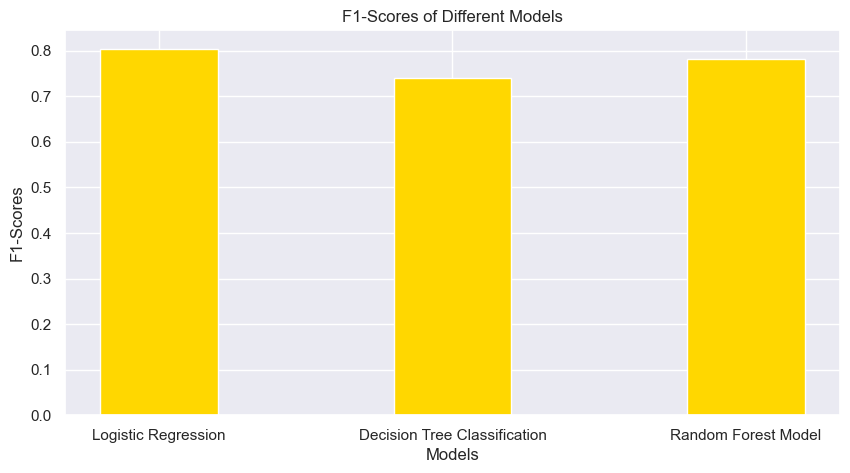

In [66]:
# creating the dataset
f1_set = {'Logistic Regression':LRf1, 'Decision Tree Classification':DTf1, 'Random Forest Model':RFf1}
models = list(f1_set.keys())
values = list(f1_set.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='gold', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("F1-Scores")
plt.title("F1-Scores of Different Models")
plt.show()

#### For all comparisons of accuracy, precision, recall, and F1-score among Logistic Regression, Decision Tree Classicification, and Random Forest Model, we can conclude that *Logistic Regression* performs the best.

---
## Comparing the Performance of Different Sets of Predictors
From the results of our Univariate Predictions above, we know that the performance of prediction using 'ComputerSkills' is relatively better, and is outstandingly better than how other variables perform. Thus, we will try to compare the accuracy, precision, recall and F1-score between the univariate prediction and multivariate prediction to get an insight of the predictive power of the variables we used.

In [67]:
X_CS = multidata[[ 'ComputerSkills']]
y = multidata['Employed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_CS, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
    
# Make predictions
y_pred = model.predict(X_test)

CSaccuracy = accuracy_score(y_test, y_pred)

# Calculate precision
CSprecision = precision_score(y_test, y_pred)

# Calculate recall
CSrecall = recall_score(y_test, y_pred)

# Calculate F1-score
CSf1 = f1_score(y_test, y_pred)

print("ComputerSkills \n\tAccuracy:", CSaccuracy)
print("\tPrecision:", CSprecision)
print("\tRecall:", CSrecall)
print("\tF1-score:", CSf1)

ComputerSkills 
	Accuracy: 0.7775131014768938
	Precision: 0.8148452478772938
	Recall: 0.7563238845811618
	F1-score: 0.7844946931241348


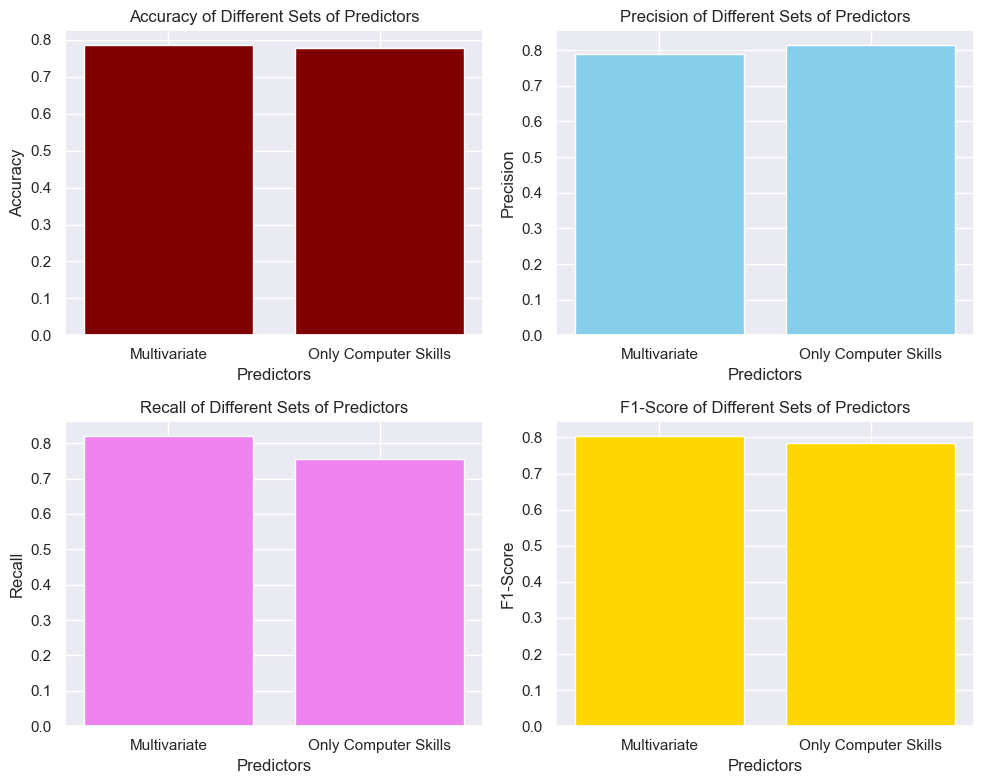

In [68]:
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['maroon', 'skyblue', 'violet', 'gold']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

acc_set = {'Multivariate': LRaccuracy, 'Only Computer Skills': CSaccuracy}
pre_set = {'Multivariate': LRprecision, 'Only Computer Skills': CSprecision}
rec_set = {'Multivariate': LRrecall, 'Only Computer Skills': CSrecall}
f1_set = {'Multivariate': LRf1, 'Only Computer Skills': CSf1}

data_sets = [acc_set, pre_set, rec_set, f1_set]

# Plot data on each subplot using a loop
for i, ax in enumerate(axs.flatten()):
    data = data_sets[i]
    models = list(data.keys())
    values = list(data.values())
    ax.bar(models, values, color=colors[i])
    ax.set_xlabel("Predictors")
    ax.set_ylabel(titles[i])
    ax.set_title(titles[i] + ' of Different Sets of Predictors')

# Adjust layout
plt.tight_layout()
plt.show()

From the visualisations using bar graphs, we can see that for most of the cases, prediction using multiple predictors perform better than only using 'ComputerSkills' as predictor. Thus, we can finally conclude that the **Logistic Regression model** is our best model in predicting one's employability.

# Ethical Considerations and Bias Mitigation

In [74]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


Check whether there is bias in the data available using senisitive variables such as age, gender and edlevel that may cause bias. There is two ways of doing so: 

1. `Fairness Metrics` : It helps to evaluate the model's predictions to identify any biases or fairness issues, such as disparities in predictions and equalized odds difference based on sensitive features such as Age, Gender, and EdLevel.

In [75]:
!pip install fairlearn

#### Calculating Equalized Odds Difference(EOD) and Demographic Parit Difference(DPD) on sensitive variables such as age, gender and edlevel:


In [90]:
from fairlearn.metrics import equalized_odds_difference

# Calculate the EOD for Age
eod_age = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['Age'])
print("Equalized Odds Difference (Age):", eod_age)

# Calculate the EOD for Gender
eod_gender = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['Gender'])
print("Equalized Odds Difference (Gender):", eod_gender)

# Calculate the EOD for EdLevel
eod_ed = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['EdLevel'])
print("Equalized Odds Difference (EdLevel):", eod_ed)

from fairlearn.metrics import demographic_parity_difference

# Calculate the DPD for Age
dpd_age = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['Age'])
print("Demographic Parity Difference (Age):", dpd_age)

# Calculate the DPD for Gender
dpd_gender = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['Gender'])
print("Demographic Parity Difference (Gender):", dpd_gender)

# Calculate the DPD for EdLevel
dpd_ed = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['EdLevel'])
print("Demographic Parity Difference (EdLevel):", dpd_ed)

Equalized Odds Difference (Age): 0.29608670374734647
Equalized Odds Difference (Gender): 0.9064651100013497
Equalized Odds Difference (EdLevel): 0.4092829439468094
Demographic Parity Difference (Age): 0.2752370474213144
Demographic Parity Difference (Gender): 0.8977910621856091
Demographic Parity Difference (EdLevel): 0.4045445033263618


Accuracy: 0.5407336827060505


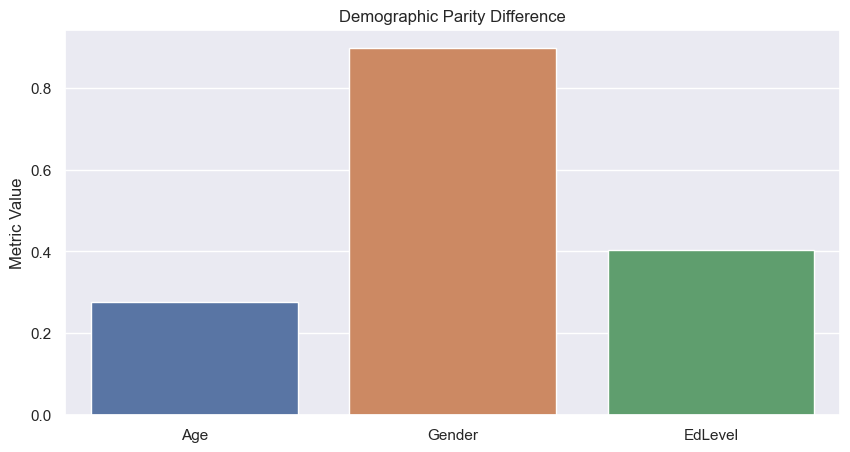

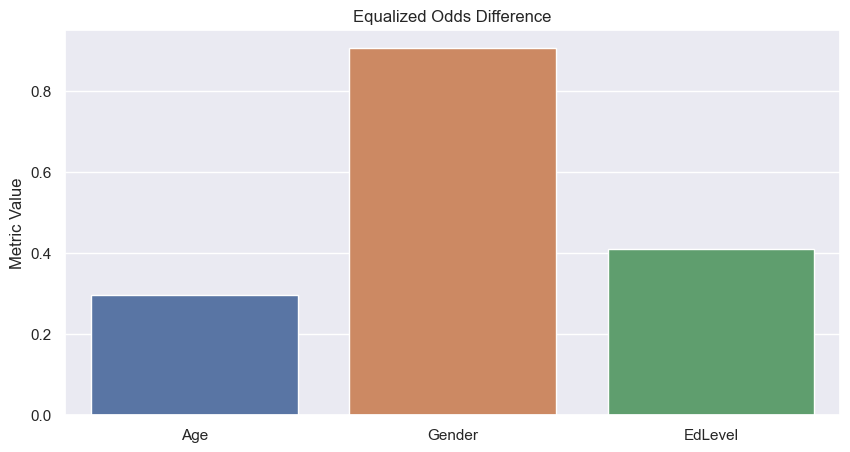

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a Model
model = LogisticRegression()

# Train the Model
model.fit(X_train, y_train)

# Evaluate the Model performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate fairness metrics
dpd_age = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['Age'])
dpd_gender = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['Gender'])
dpd_ed = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['EdLevel'])
eod_age = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['Age'])
eod_gender = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['Gender'])
eod_ed = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['EdLevel'])


# Visualize Demographic Parity Difference
plt.figure(figsize=(10, 5))
sb.barplot(x=['Age', 'Gender', 'EdLevel' ], y=[dpd_age, dpd_gender, dpd_ed])
plt.ylabel('Metric Value')
plt.title('Demographic Parity Difference')
plt.show()

# Visualize Equalized Odds Difference
plt.figure(figsize=(10, 5))
sb.barplot(x=['Age', 'Gender', 'EdLevel'], y=[eod_age, eod_gender, eod_ed])
plt.ylabel('Metric Value')
plt.title('Equalized Odds Difference')
plt.show()

`Demographic Parity Difference`is the difference in the proportion of positive outcome between the largest and the smallest group-level selection rate.The demographic parity difference of 0 means that all groups have the same selection rate while the demographic parity difference of non-zero or 1 means that there is bias in the selection rate. 

#### There is non-zero values for age, number and education level but the metric value for gender is the highest. Hence, this shows that there is bias in employability of job applicants for age, gender and education level but it is the most biased for gender.

`Equalized Odds Difference`is the difference of true positive rates between the unprivileged and the privileged groups.When the equalized odds difference (EOD) is non-zero, it indicates a disparity in the model's predictive performance between different gender/age groups.A zero EOD indicates equal predictive performance while a positive EOD indicates that there is a disparity in favor of one group.

#### There is non-zero values for age, number and education level but the metric value for gender is the highest and the metric level for age is nearest to zero. Hence, this shows that there is bias in employability of job applicants for age, gender and education level but it is the most biased for gender.


2. `HeatMap`: This heatmap shows the distribution of employability across different gender and age groups.Higher count values are represented by darker shades, while lower count values are represented by lighter shades.By visualizing the distribution of employability, you can identify any patterns or disparities in employment across different demographic groups, helping to assess potential biases or fairness issues in the hiring process.



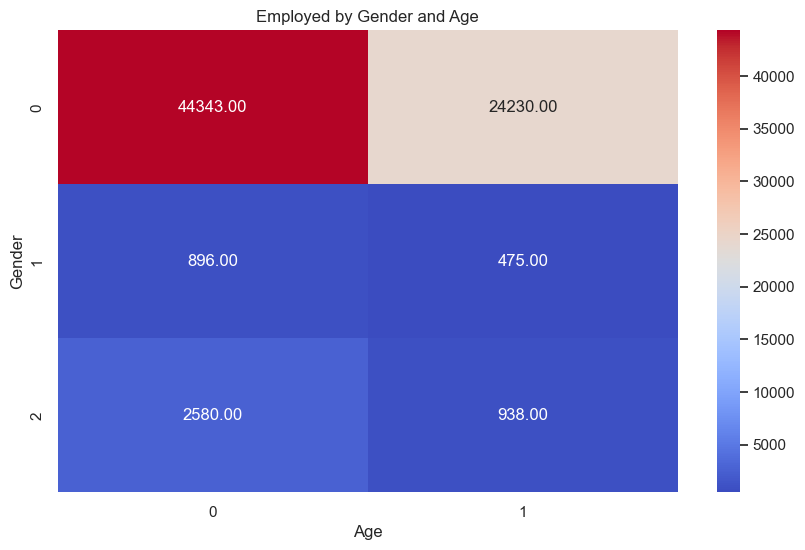

In [86]:
df = pd.DataFrame(data)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(df.pivot_table(index='Gender', columns='Age', values='Employed', aggfunc='count'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Employed by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

#### As you can see above, the highest count can be observed when gender is 0 and age is 0 from the darker shade of the heatmap. This shows that there is bias for certain age and gender.

#### There are ways to `mitigate` the bias in data given:

1.`Fairness Constraint` promotes fairness and mitigate biases in predictions. It ensures that the predictions made by the model is fair and equitable across different groups.

In [116]:
X_gender = data[[ 'Gender']]
y = data['Employed']

X_train, X_test, y_train, y_test = train_test_split(X_gender, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
    
# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

#Calculate DPD
dpd_gender = demographic_parity_difference(y_test, model.predict(X_test), sensitive_features=X_test['Gender'])

#Calculate EOD

# Calculate the EOD for Gender
eod_gender = equalized_odds_difference(y_test, model.predict(X_test), sensitive_features=X_test['Gender'])

print("Gender \n\tAccuracy:", accuracy)
print("\tPrecision:", precision)
print("\tRecall:", recall)
print("\tF1-score:", f1)
print("\tDemographic Parity Difference (Gender):", dpd_gender)
print("\tEqualized Odds Difference (Gender):", eod_gender)


Gender 
	Accuracy: 0.5395086095419588
	Precision: 0.5401326820733396
	Recall: 0.9417821278759375
	F1-score: 0.6865270570793179
	Demographic Parity Difference (Gender): 1.0
	Equalized Odds Difference (Gender): 1.0


In [117]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.linear_model import LogisticRegression

# Define fairness constraints (e.g., Demographic Parity)
fairness_constraints = DemographicParity()

# Choose a base estimator (e.g., logistic regression)
base_estimator = LogisticRegression()

# Train model with fairness constraints
fairness_model = ExponentiatedGradient(base_estimator, constraints=fairness_constraints)
fairness_model.fit(X_train, y_train, sensitive_features=X_train['Gender'])


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x000001CA1AC21150>,
                      estimator=LogisticRegression(), nu=0.0010279614861228232)

One of the variables that may cause bias is chosen which is gender for this instance.

#### Computing fairness metrics after applying fairness constraint for gender:

In [118]:
# Compute fairness metrics after applying fairness constraints
y_pred_a = fairness_model.predict(X_test)

#Calculate accuracy    
accuracy_a = accuracy_score(y_test, y_pred_a)

# Calculate precision
precision_a = precision_score(y_test, y_pred_a)

# Calculate recall
recall_a = recall_score(y_test, y_pred_a)

# Calculate F1-score
f1_a = f1_score(y_test, y_pred_a)

#Calculate DPD
dpd_gender_a = demographic_parity_difference(y_test, y_pred_a, sensitive_features=X_test['Gender'])

#Calculate EOD
eod_gender_a = equalized_odds_difference(y_test, y_pred_a, sensitive_features=X_test['Gender'])

print("Gender after applying fairness constraints \n\tAccuracy:", accuracy_a)
print("\tPrecision:", precision_a)
print("\tRecall:", recall_a)
print("\tF1-score:", f1_a)
print("\tDPD:", dpd_gender_a)
print("\tEOD:", eod_gender_a)

Gender after applying fairness constraints 
	Accuracy: 0.5353569727080922
	Precision: 0.5354030501089324
	Recall: 0.9996186602262616
	F1-score: 0.6973176679228552
	DPD: 0.007102272727272707
	EOD: 0.009063444108761365


In [119]:
# Compare the metrics obtained
print("\nComparison:")
print("Change in Demographic Parity Difference (Gender):", dpd_gender_a - dpd_gender)
print("Change in Equalized Odds Difference (Gender):", eod_gender_a - eod_gender)
print("Change in Accuracy:", accuracy_a - accuracy)
print("Change in Precision:", precision_a - precision)
print("Change in Recall:", recall_a - recall)
print("Change in F1-score:", f1_a - f1)


Comparison:
Change in Demographic Parity Difference (Gender): -0.9928977272727273
Change in Equalized Odds Difference (Gender): -0.9909365558912386
Change in Accuracy: -0.0041516368338665455
Change in Precision: -0.004729631964407233
Change in Recall: 0.057836532350324044
Change in F1-score: 0.010790610843537274


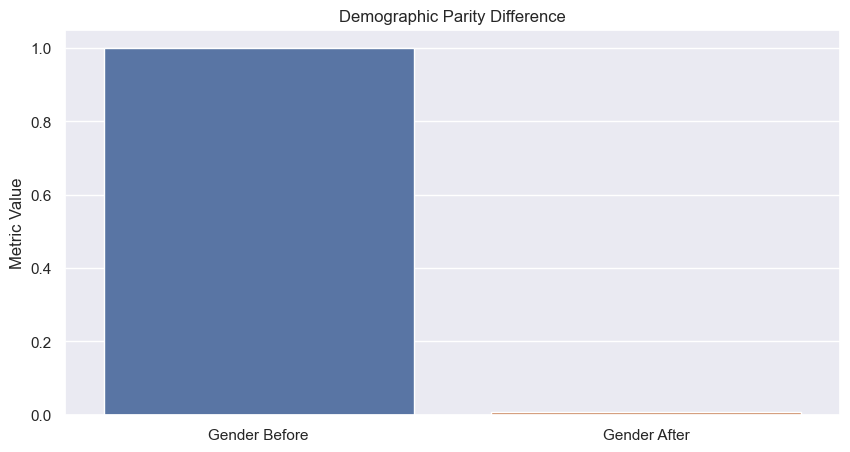

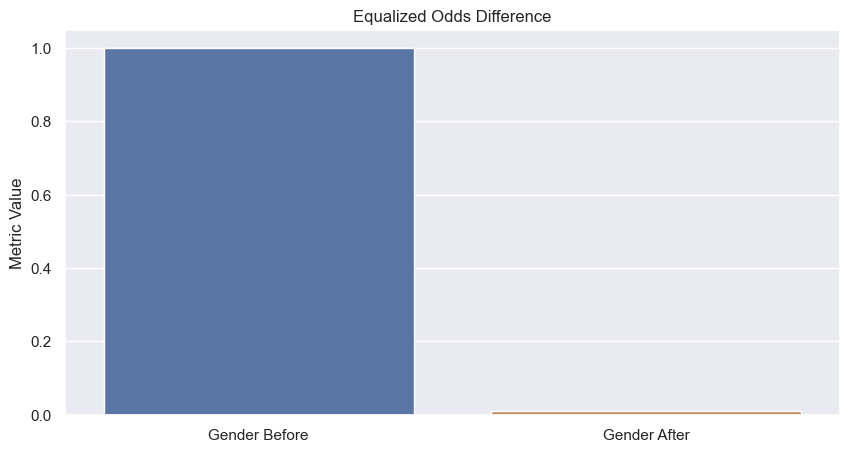

In [120]:
#Visulize and Plot barplot to show the Differece in DPD and EOD
plt.figure(figsize=(10, 5))
sb.barplot(x=['Gender Before', 'Gender After' ], y=[dpd_gender, dpd_gender_a])
plt.ylabel('Metric Value')
plt.title('Demographic Parity Difference')
plt.show()

plt.figure(figsize=(10, 5))
sb.barplot(x=['Gender Before', 'Gender After' ], y=[eod_gender, eod_gender_a])
plt.ylabel('Metric Value')
plt.title('Equalized Odds Difference')
plt.show()

#### Looking at the comparison before and after implementing fairness constraint model, you can observe that there is a fall in Demographic Parity Difference and  Equalized Odds Difference. The values of both DPD and EOD is near 0 ensuring the gender groups have same selection rate and eliminating bias.

We can then apply this for every other variable that will affect one's employability.

2. `Random Forest Classifier`: Choose algorithms that are less sensitive to biases and more transparent in their decision-making process. For instance, the Random Forest Classifier. (It's used above for other stuff)

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Use a Random Forest classifier which tends to be less biased
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

3. `Rejection Option Classification`: In this model, the assumption is that most discrimination occurs when a model is least certain of the prediction i.e. around the decision boundary (classification threshold). Thus by rejecting its predictions when the model lacks sufficient information or confidence, we can reduce the bias in model predictions.

In [123]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Define a simple baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Predict using the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_accuracy)


from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

#Train a binary classification model
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
model = LogisticRegression()
model.fit(X, y)

# Determine confidence threshold
confidence_threshold = 0.7

# Make predictions with reject option
y_pred_proba = model.predict_proba(X)
y_pred = np.where(y_pred_proba[:, 1] >= confidence_threshold, 1, -1)

# Replace rejected predictions with default decision
default_decision = 0
y_pred[y_pred == -1] = default_decision

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print("ROC Accuracy:", accuracy)


Baseline Accuracy: 0.5354250323283196
ROC Accuracy: 0.845


Since the ROC accuracy is higher than the baseline model accuracy, it indicates that applying the rejection option classification technique did not significantly affect the overall accuracy of the model while potentially reducing bias or improving fairness. This suggests that it helped the model avoid making predictions where it was uncertain or less confident, leading to more reliable predictions.



 #### There are ethical considerations regarding the data given:

1. Even if we try to implement algorithms or models to ensure there is no bias in the data, if the hiring process is biased, it is hard to eliminate bias even with algorithms. Hence, it is essential to promote equity and social responsibility in hiring practices, fostering a more inclusive workforce.

2. Hirers should regularly evaluate the model's performance and fairness metrics to identify areas for improvement and address any unintended consequences.

## Conclusion

Univariate Prediction was used to see if any variable is outstanding. Then, 3 multivariate model selections which is Logistic Regression, Decision Tree and Random Forest Model were used. The accuracy, precision, recall and f1-score of all 3 models were compared.

#### We came to the conclusion that Logistic Regression using multiple variables is the best in predicting one's employability.


Then, Fairness Metrics and HeatMap was used to show the bias in sensitive variables such as age, education level and gender. Sometimes, these variables do cause bias in the industry.

#### Models such as Fairness Constraint, Rejection Option Classification and Random Forest Classifier can be used to mitigate the bias in variables affecting one's employability. 